# Utilities 


In [2]:
#Imports Libraries 

# complex networks package - guide https://networkx.org/ 
import networkx as nx

# visualization packages - https://matplotlib.org/ 
import matplotlib.pyplot as plt
%matplotlib inline
from networkx.drawing.nx_agraph import graphviz_layout

# n-dinsional array tool - https://numpy.org/ 
import numpy as np

import pygraphviz

import matplotlib.colors as mcolors

import scipy

from typing import Iterable
# for Notebook
%matplotlib inline

In [ ]:
def draw(G, pos, measures, measure_name):
    
    nodes = nx.draw_networkx_nodes(G, pos, node_size=250, cmap=plt.cm.plasma, 
                                   node_color=list(measures.values()),
                                   nodelist=measures.keys())
    nodes.set_norm(mcolors.SymLogNorm(linthresh=0.01, linscale=1, base=10))
    # labels = nx.draw_networkx_labels(G, pos)
    edges = nx.draw_networkx_edges(G, pos)

    plt.title(measure_name)
    plt.colorbar(nodes)
    
    plt.axis('off')
    plt.show()

# Question 1

## Ingesting the edgelist

In [2]:
#Ingest edgelist as DiGraph

DiG = nx.read_edgelist(path = "/Users/wdaugherty/ECE 5260/ECE-5260-Graph-Based-Data-Science-for-Networked-Systems/HW6/wikispeedia.edgelist", create_using=nx.DiGraph())
DiG.is_directed()

True

## Identifying max hub and authority value.


In [3]:
#Finds HITS Values

h,a = nx.hits(DiG)

#Prints the max hub key-value pair 
print(max(h.items(), key = lambda x: x[1]))

/Users/wdaugherty/opt/anaconda3/envs/ECE5260/lib/python3.9/site-packages/networkx/algorithms/link_analysis/hits_alg.py:78: FutureWarning: adjacency_matrix will return a scipy.sparse array instead of a matrix in Networkx 3.0.
  A = nx.adjacency_matrix(G, nodelist=list(G), dtype=float)


('United_States', 0.014543979894890917)


In [4]:
#Prints the max highest authority key-value pair
print(max(a.items(), key = lambda x: x[1]))

('Driving_on_the_left_or_right', 0.001910790852194192)


## Pagerank

In [15]:
#Creates a dict using the NetworkX function 
dict1 = nx.pagerank(DiG, alpha=0.9)

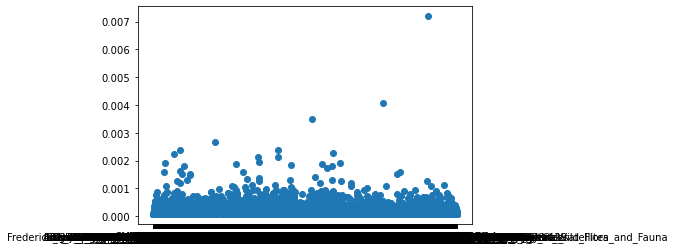

In [16]:
#Plots the values of the NetworkX PageRank
plt.scatter(list(dict1.keys()), list(dict1.values()))

In [11]:
"""
Custom PageRank


Args: 
    G: Input graph
    a: alpha parameter

Outputs:
    A dictionary with the  PageRank

"""

def PageRank(G ,a):

    #Makes N the number of nodes in G
    N = G.number_of_nodes()
    
    #Makes full matrix filled with 1/N
    matrix = np.full((N,N), 1.0/N)

    #Modifies the transition matrix 
    for i,j in enumerate(G.nodes()):
        for k,l in enumerate(G.nodes()):

            #If N_out != 0
            if G.out_degree(j) != 0:

                #Add edge on condition 1
                if G.has_edge(j,l):
                    matrix[i,k]= (a/N) +((1-a) / G.out_degree(j))

                #Else add edge on condition 2
                else: 
                    matrix[i,k]= a/N


    #Finds the eigenvalues and egienvector of the transpose of a matrix
    eigVal, eigVect = np.linalg.eig(np.transpose(matrix))

    
    #References https://numpy.org/doc/stable/reference/generated/numpy.matrix.shape.html and
    #  https://www.kaggle.com/code/rajat95gupta/implementing-pagerank-on-famous-social-networks
    size = matrix.shape[1]


    #Creates the results to be returned
    res = eigVect[:size, 0]
    
    #Returns the PageRank dictionary
    return res

In [12]:
#Creates a dict using the custom PageRank function
ls = PageRank(DiG, 0.1)

/Users/wdaugherty/opt/anaconda3/envs/ECE5260/lib/python3.9/site-packages/matplotlib/cbook/__init__.py:1298: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


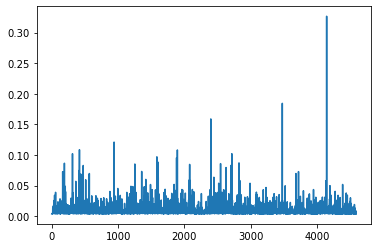

In [13]:
#Plots the values of the cutom PageRank
plt.plot(ls)

/Users/wdaugherty/opt/anaconda3/envs/ECE5260/lib/python3.9/site-packages/matplotlib/collections.py:200: ComplexWarning: Casting complex values to real discards the imaginary part
  offsets = np.asanyarray(offsets, float)


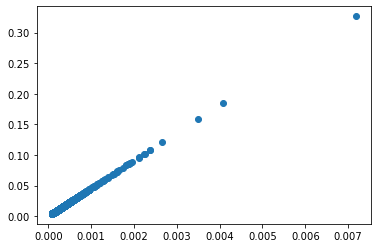

In [17]:
#Plots the values of the two PageRank output

plt.scatter(list(dict1.values()), ls)

# Question 2

## Generating a connected random graph


<frozen importlib._bootstrap>:228: RuntimeWarning: scipy._lib.messagestream.MessageStream size changed, may indicate binary incompatibility. Expected 56 from C header, got 64 from PyObject


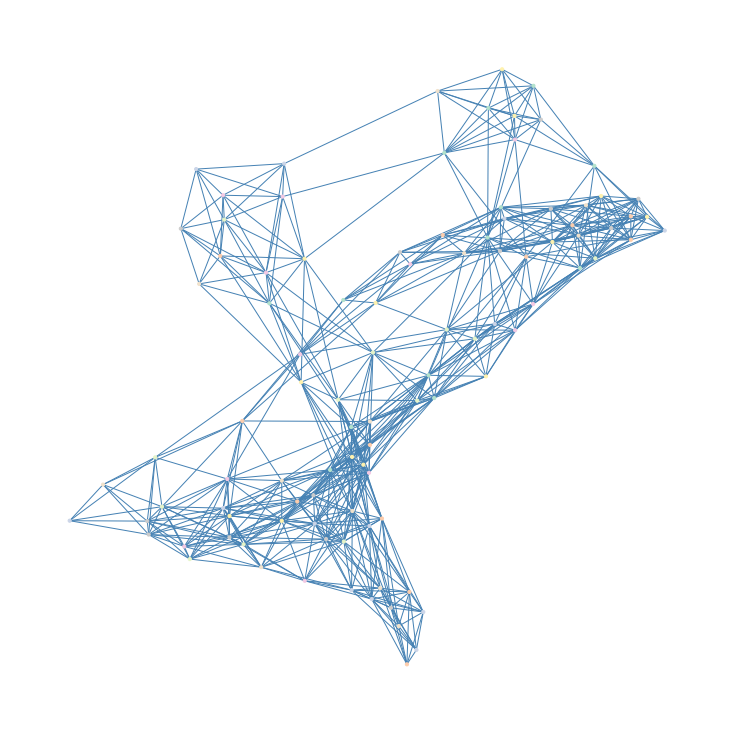

In [3]:
#Creates the random geometric graph
G = nx.random_geometric_graph(100, radius = 0.225, seed = 96845)

#Plots the random geometric graph
plt.figure(figsize = (10,10))
nx.draw(G,node_size =10, edge_color = "#4682b4", node_color = range(len(G)) , cmap = plt.cm.Pastel2)
plt.show()

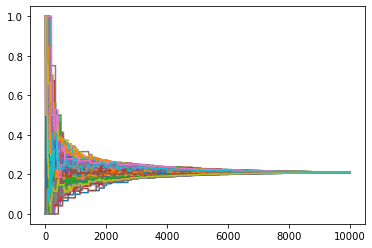

In [4]:
"""
Gossiping 

Args: 
    N: number of nodes in the graph 
    T: the time 

Outputs:
    Plot of the convergence of p 
"""
def gossiping(G):
    
    #Makes N the number of nodes in G
    N = G.number_of_nodes()

    #Defines time for gossipping
    T= 10000

   #Creates an empty array
    x = np.empty([N,T])

    #Fills the array according to the bernoulli distribution
    for i in range(N):
        x[i,:] = np.random.binomial(n=1, p= 0.2)

    #Creates a for loop to update the matrix
    for t in range(T):

        #Finds random edges
        uv = np.random.choice(range(len(G.edges)))
        i_t,j_t = list(G.edges)[uv]
    
        #Conditionally updates the edges "Gossiping" according to the homework
        for node in G.nodes:
            if node == i_t or node == j_t:
                x[node, t] = (x[i_t, t-1] + x[j_t, t-1])/2
            else:
                x[node, t] = x[node, t-1]

    #Plots the values 
    for k in range(N):
        plt.plot(range(T), x[k, :])
    
    return (plt.show())


gossiping(G)
    